## Clone Git Repository

In [ ]:
!git clone "https://github.com/amazon-science/gan-control"

## Download Pre-trained GAN model
https://drive.google.com/file/d/19v0lX69fV6zQv2HbbYUVr9gZ8ZKvUzHq/view?usp=sharing

Put the extracted folder into the directory /gan-control/resources/gan_models

In [19]:
import os
import torch
from PIL import Image
import pandas as pd
import sys
from IPython.display import display

sys.path.append('../src')  # insert the path to src here


## Load Controller

In [4]:
%cd ./gan-control/src
from gan_control.inference.controller import Controller
controller_path = '../resources/gan_models/controller_age015id025exp02hai04ori02gam15'
controller = Controller(controller_path)

c:\Users\user\Desktop\Work\4th Year 1st Half\Deep Learning\CSS485_GAN\gan-control\src


INFO:gan_control.inference.controller: Init Controller class...
INFO:gan_control.inference.inference: Init inference class...
INFO:gan_control.inference.inference: Retrieve config from ../resources/gan_models/controller_age015id025exp02hai04ori02gam15\generator\args.json
INFO:gan_control.inference.inference: Init Batch Utils...
INFO:gan_control.utils.mini_batch_multi_split_utils: MiniBatchUtils parameters:
mini batch size 16
total batch size 16
sub group names ['id', 'expression', 'orientation', 'gamma', 'age', 'hair', 'other']
0) id: place in mini batch: [0, 4] place in latent: [0, 128]
1) expression: place in mini batch: [4, 6] place in latent: [128, 192]
2) orientation: place in mini batch: [6, 8] place in latent: [192, 256]
3) gamma: place in mini batch: [8, 10] place in latent: [256, 320]
4) age: place in mini batch: [10, 12] place in latent: [320, 384]
5) hair: place in mini batch: [12, 14] place in latent: [384, 448]
6) other: place in mini batch: [14, 16] place in latent: [448,

## Generate original images

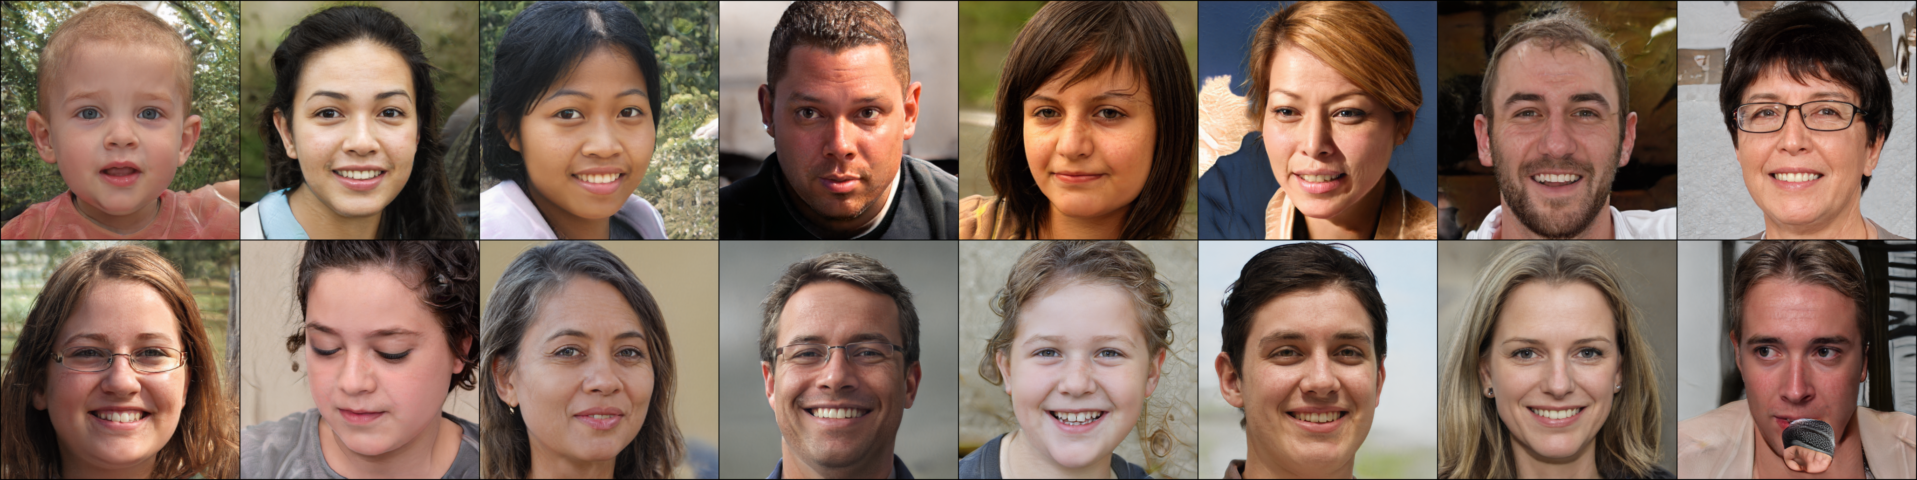

In [20]:
batch_size = 16
truncation = 0.7
resize = 480
initial_image_tensors, initial_latent_z, initial_latent_w = controller.gen_batch(batch_size=batch_size, truncation=truncation)
og_img = controller.make_resized_grid_image(initial_image_tensors, resize=resize, nrow=8)
display(og_img)
og_img.show()

## Image Generating Application

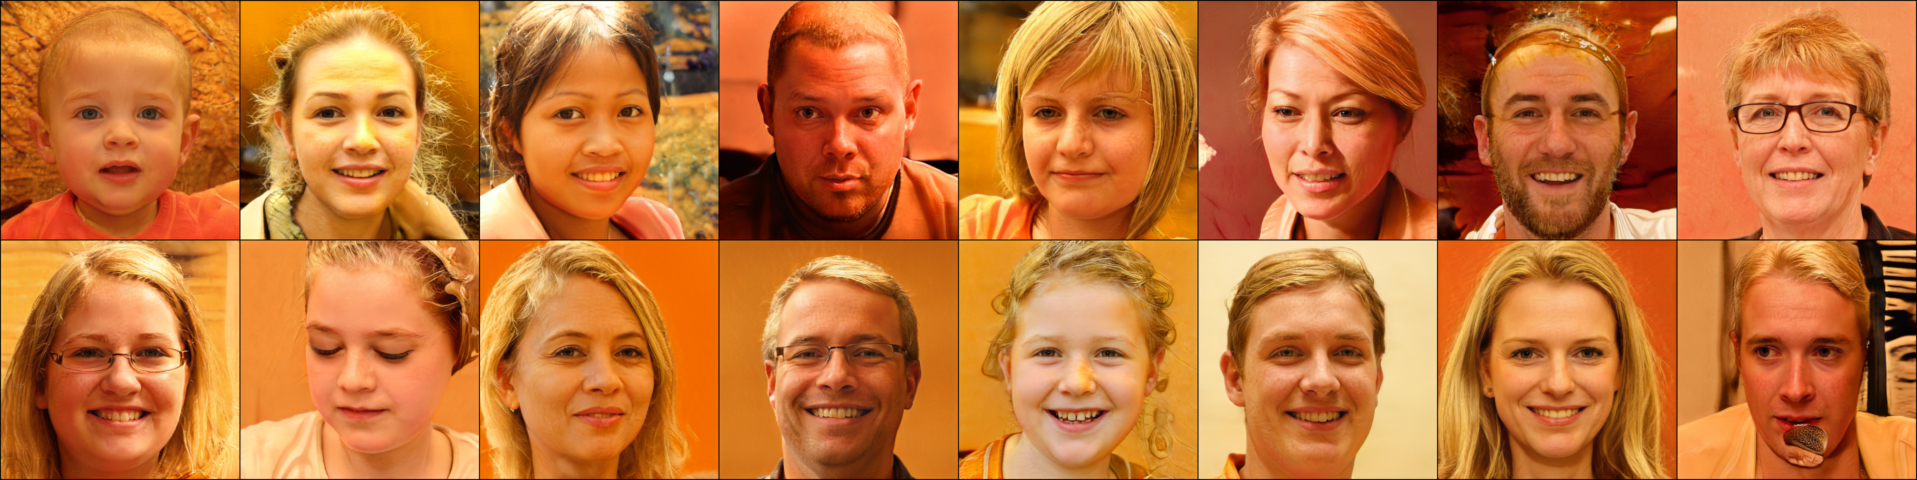

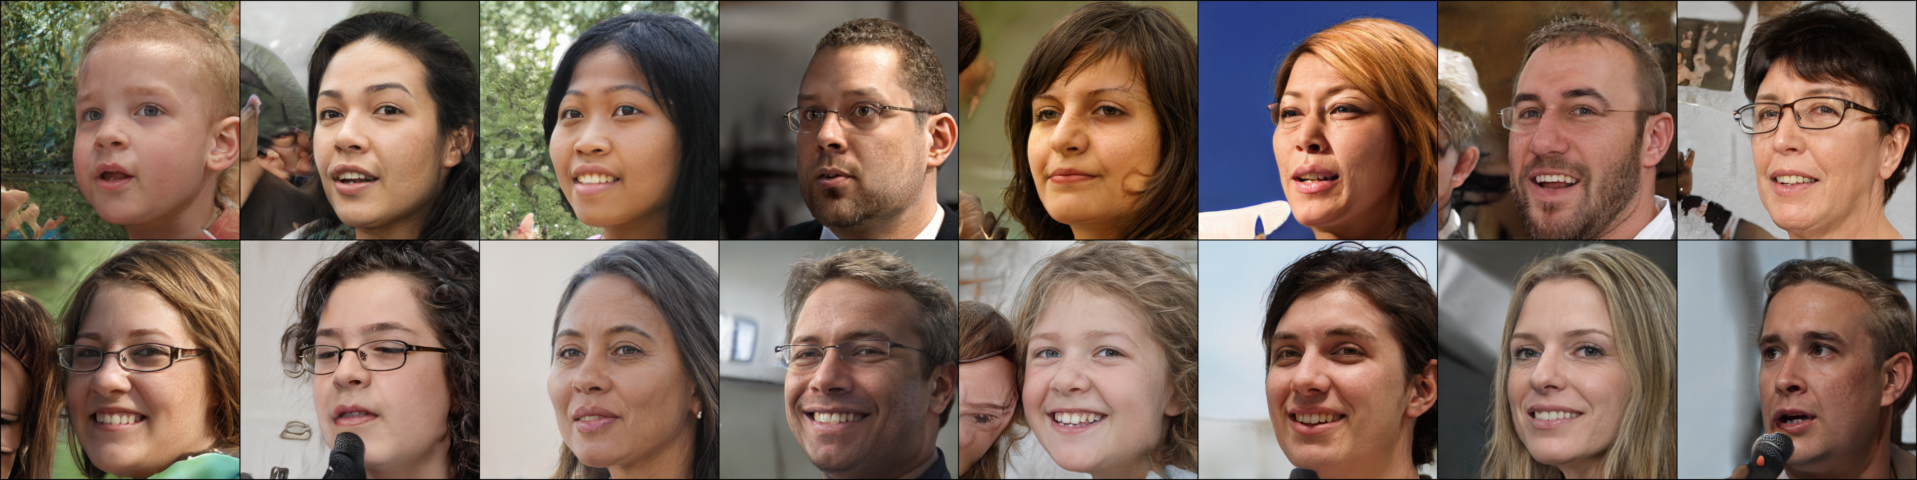

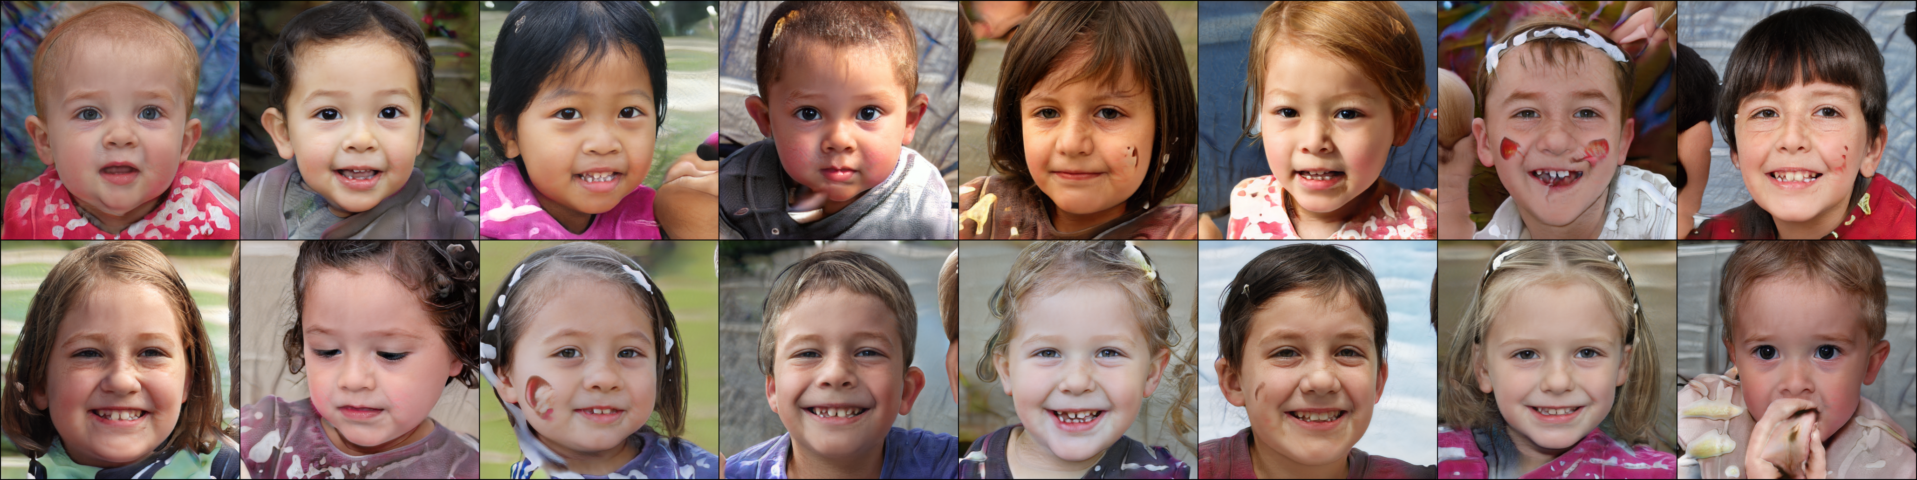

In [21]:
import tkinter as tk
import torchvision

# --- main ---

master = tk.Tk()
master.title('Face Generation')
master.geometry("800x500")
def controlPose(input1, input2, input3):
    pose_control = torch.tensor([[input1, input2, input3]])
    image_tensors, _, modified_latent_w = controller.gen_batch_by_controls(latent=initial_latent_w, input_is_latent=True, orientation=pose_control)
    img = controller.make_resized_grid_image(image_tensors, resize=resize, nrow=8)
    display(img)
    img.show()
def controlAge(input1):
    age_control = torch.tensor([[input1]])
    image_tensors, _, modified_latent_w = controller.gen_batch_by_controls(latent=initial_latent_w, input_is_latent=True, age=age_control)
    img = controller.make_resized_grid_image(image_tensors, resize=resize, nrow=8)
    display(img)
    img.show()

def controlHair(input1, input2, input3):
    hair_color = torch.tensor([[input1, input2, input3]])
    image_tensors, _, modified_latent_w = controller.gen_batch_by_controls(latent=initial_latent_w, input_is_latent=True, hair=hair_color)
    img = controller.make_resized_grid_image(image_tensors, resize=resize, nrow=8)
    display(img)
    img.show()

def feature_command():
    controlHair(float(h1.get()), float(h2.get()), float(h3.get()))
    controlPose(float(p1.get()), float(p2.get()), float(p3.get()))
    controlAge(float(a1.get()))

tk.Label(master,text="Choose your feature:").grid(row=0)
tk.Label(master,text="1) Hair :").grid(row=3)
tk.Label(master,text="2) Pose :").grid(row=6)
tk.Label(master,text="3) Age :").grid(row=9)

h1 = tk.Entry(master, width=5)
h2 = tk.Entry(master, width=5)
h3 = tk.Entry(master, width=5)
p1 = tk.Entry(master, width=5)
p2 = tk.Entry(master, width=5)
p3 = tk.Entry(master, width=5)
a1 = tk.Entry(master, width=5)

h1.insert(0, "0")
h2.insert(0, "0")
h3.insert(0, "0")
p1.insert(0, "0")
p2.insert(0, "0")
p3.insert(0, "0")
a1.insert(0, "0")

tk.Label(master,text="R (0-1)").grid(row=2,column=1)
tk.Label(master,text="G (0-1)").grid(row=2,column=2)
tk.Label(master,text="B (0-1)").grid(row=2,column=3)
h1.grid(row=3, column=1)
h2.grid(row=3, column=2)
h3.grid(row=3, column=3)

tk.Label(master,text="Yaw (-360, 360)").grid(row=5,column=1)
tk.Label(master,text="Pitch (-360, 360)").grid(row=5,column=2)
tk.Label(master,text="Roll (-360, 360)").grid(row=5,column=3)
p1.grid(row=6, column=1)
p2.grid(row=6, column=2)
p3.grid(row=6, column=3)

tk.Label(master,text="Age (Positive Integer)").grid(row=8,column=1)
a1.grid(row=9, column=1)
button1 = tk.Button(master, text='Confirm', command=feature_command).grid(column=2,pady=30)

master.mainloop()
